In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('train.csv.zip')

In [3]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [4]:
bids= pd.read_csv('bids.csv.zip')

In [5]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [7]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [8]:
bids = bids.drop('bid_id', axis=1)

In [9]:
min_time = bids['time'].min()
bids['time_normalized'] = round((bids['time'] - min_time) * 19 / 1e9,2)
bids.head()

,bidder_id,auction,merchandise,device,time,country,ip,url,time_normalized
0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,2419200.0
1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,2419200.0
2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,2419200.0
3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,2419200.0
4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,2419200.0


In [10]:
train.set_index('bidder_id')
bids.set_index('bidder_id')
df = pd.merge(train, bids)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071224 entries, 0 to 3071223
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bidder_id        object 
 1   payment_account  object 
 2   address          object 
 3   outcome          float64
 4   auction          object 
 5   merchandise      object 
 6   device           object 
 7   time             int64  
 8   country          object 
 9   ip               object 
 10  url              object 
 11  time_normalized  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 304.6+ MB


In [11]:
MissingValues = df.isnull().sum()
MissingValuesdf = pd.DataFrame(MissingValues)
MissingValuesdf.columns = ['Missing Values']
MissingValuesdf

,Missing Values
bidder_id,0
payment_account,0
address,0
outcome,0
auction,0
merchandise,0
device,0
time,0
country,2701
ip,0


In [12]:
df. count()

bidder_id          3071224
payment_account    3071224
address            3071224
outcome            3071224
auction            3071224
merchandise        3071224
device             3071224
time               3071224
country            3068523
ip                 3071224
url                3071224
time_normalized    3071224
dtype: int64

In [13]:
df = df.dropna() 
df. count()

bidder_id          3068523
payment_account    3068523
address            3068523
outcome            3068523
auction            3068523
merchandise        3068523
device             3068523
time               3068523
country            3068523
ip                 3068523
url                3068523
time_normalized    3068523
dtype: int64

In [14]:
duplicate_rows_df = df[df.duplicated()]
print( "number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (64, 12)


In [15]:
print(df.isnull().sum())

bidder_id          0
payment_account    0
address            0
outcome            0
auction            0
merchandise        0
device             0
time               0
country            0
ip                 0
url                0
time_normalized    0
dtype: int64


In [16]:
df.drop_duplicates(inplace=True)
df.count()

bidder_id          3068459
payment_account    3068459
address            3068459
outcome            3068459
auction            3068459
merchandise        3068459
device             3068459
time               3068459
country            3068459
ip                 3068459
url                3068459
time_normalized    3068459
dtype: int64

In [17]:
df['outcome'].value_counts()

0.0    2656312
1.0     412147
Name: outcome, dtype: int64

In [18]:
(412147/(2656312+412147))*100

13.431725827198605

In [19]:
Dbots = df['outcome'] == 1.0
Dbots = df[Dbots]
Dbots.head()

,bidder_id,payment_account,address,outcome,auction,merchandise,device,time,country,ip,url,time_normalized
3793,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,1l3p3,mobile,phone65,9632357157894736,id,246.142.185.135,vasstdc27m7nks3,8366.0
3794,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,62d9x,mobile,phone557,9632435631578947,id,246.142.185.135,vasstdc27m7nks3,9857.0
3795,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,62d9x,mobile,phone212,9632481315789473,id,246.142.185.135,vasstdc27m7nks3,10725.0
3796,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,436hc,mobile,phone20,9632506210526315,id,246.142.185.135,vasstdc27m7nks3,11198.0
3797,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,1l3p3,mobile,phone55,9634184894736842,id,246.142.185.135,vasstdc27m7nks3,43093.0


In [20]:
Dbots.count()

bidder_id          412147
payment_account    412147
address            412147
outcome            412147
auction            412147
merchandise        412147
device             412147
time               412147
country            412147
ip                 412147
url                412147
time_normalized    412147
dtype: int64

In [21]:
CountryOrd = Dbots.groupby(['country'])['bidder_id'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
CountryOrd.head(6)

,country,Count
80,in,86385
180,us,66663
77,id,20495
43,de,18530
168,th,17282
187,za,13364


<AxesSubplot:xlabel='country', ylabel='Count'>

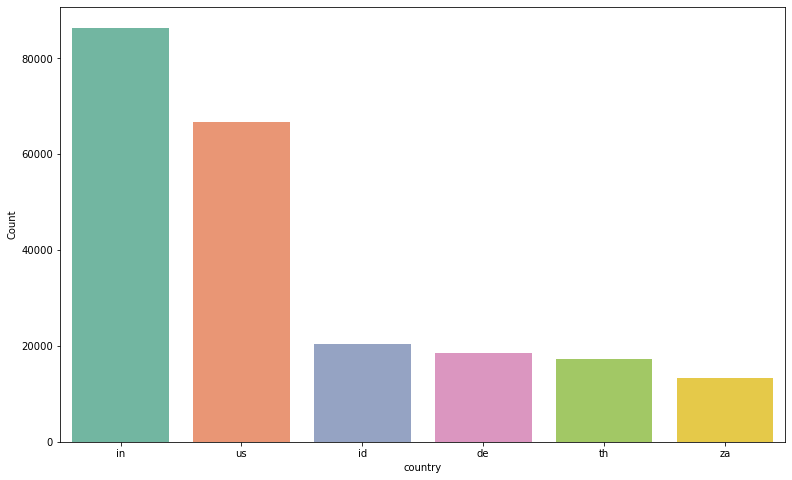

In [22]:
A = CountryOrd[0:6]
plt.figure(figsize=(13,8))
sns.barplot(x = A.country, y= A.Count, data= A, palette="Set2")

In [23]:
DeviceOrd = Dbots.groupby(['device'])['bidder_id'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
DeviceOrd.head(6)

,device,Count
589,phone17,16219
169,phone119,14825
2157,phone46,14548
1943,phone4,14102
2630,phone65,9963
2571,phone62,9404


<AxesSubplot:xlabel='device', ylabel='Count'>

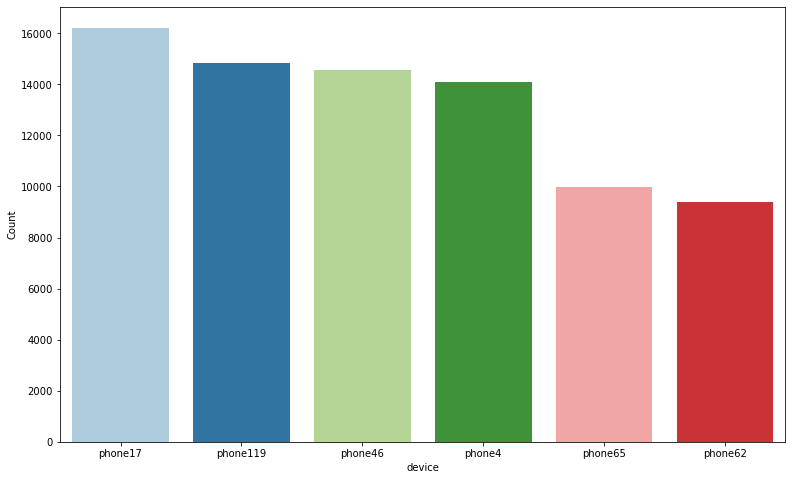

In [24]:
B = DeviceOrd[0:6]
plt.figure(figsize=(13,8))
sns.barplot(x = B.device, y= B.Count, data= B, palette="Paired")

In [25]:
UrlOrd = Dbots.groupby(['url'])['bidder_id'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
UrlOrd.head(3)

,url,Count
47790,vasstdc27m7nks3,292145
32482,lacduz3i6mjlfkd,2055
42130,rmdm1f1lak48s6g,1324


<AxesSubplot:xlabel='url', ylabel='Count'>

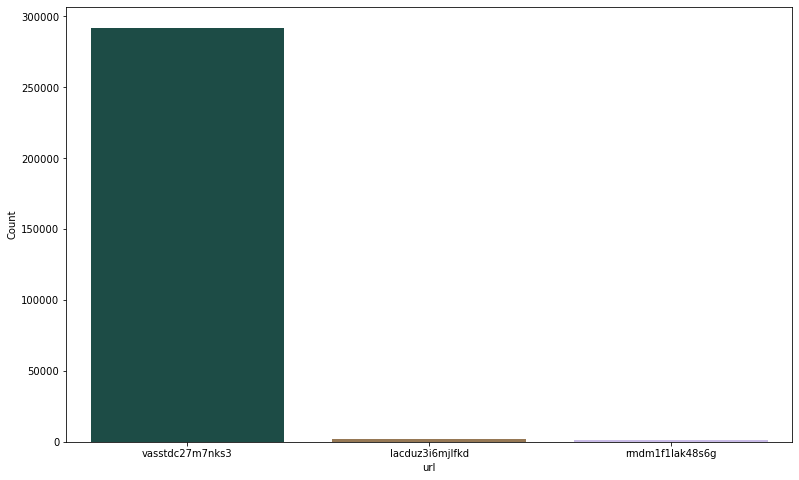

In [26]:
C = UrlOrd[0:3]
plt.figure(figsize=(13,8))
sns.barplot(x = C.url, y= C.Count, data= C, palette="cubehelix")

In [27]:
MerchOrd = Dbots.groupby(['merchandise'])['bidder_id'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
MerchOrd.head(6)

,merchandise,Count
6,sporting goods,230233
4,mobile,105110
3,jewelry,37007
2,home goods,18678
1,computers,11667
5,office equipment,7945


<AxesSubplot:xlabel='merchandise', ylabel='Count'>

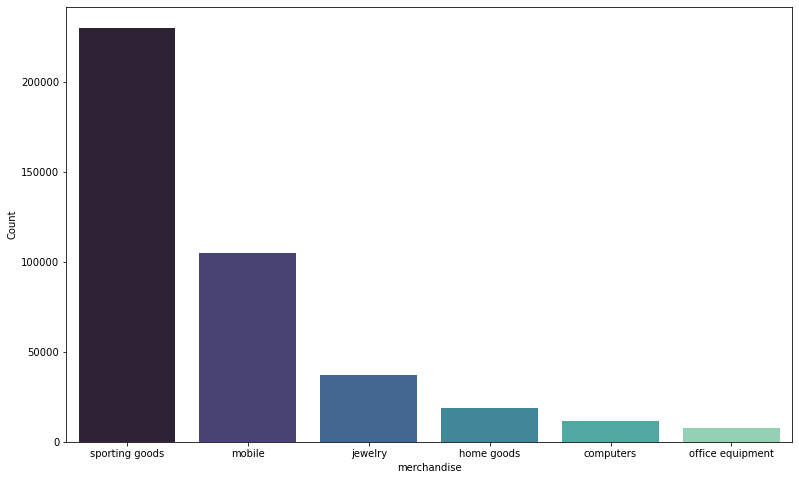

In [28]:
D = MerchOrd[0:6]
plt.figure(figsize=(13,8))
sns.barplot(x = D.merchandise, y= D.Count, data= D, palette="mako")

In [29]:
df.describe()

,outcome,time,time_normalized
count,3.068459e+06,3.068459e+06,3.068459e+06
mean,1.343173e-01,9.696611e+15,1.229190e+06
std,3.409929e-01,5.256740e+13,9.987805e+05
min,0.000000e+00,9.631917e+15,0.000000e+00
25%,0.000000e+00,9.640958e+15,1.717795e+05
50%,0.000000e+00,9.700339e+15,1.300029e+06
75%,0.000000e+00,9.761309e+15,2.458454e+06
max,1.000000e+00,9.772885e+15,2.678399e+06


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3068459 entries, 0 to 3071223
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bidder_id        object 
 1   payment_account  object 
 2   address          object 
 3   outcome          float64
 4   auction          object 
 5   merchandise      object 
 6   device           object 
 7   time             int64  
 8   country          object 
 9   ip               object 
 10  url              object 
 11  time_normalized  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 304.3+ MB


In [31]:
target = 'outcome'
features = ['bidder_id', 'payment_account','address','outcome','auction','merchandise','device','time','country','ip','url']
numeric_features = ['outcome', 'time']
categorical_features = ['bidder_id', 'payment_account', 'address', 'auction', 'merchandise', 'device', 'country', 'ip', 'url']

In [32]:
#Label Encoder 
for col in categorical_features:
    le = LabelEncoder()
    le.fit(list(df[col].astype(str).values))
    df[col] = le.transform(list(df[col].astype(str).values))

In [33]:
X = df.drop('outcome', axis=1)
y = df['outcome']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [35]:
#Gaussian Classifier
forest = RandomForestClassifier(n_estimators=10, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6, random_state=1)

In [36]:
print("Accuracy on training set:",format(forest.score(X_train, y_train))) 
print("Accuracy on test set:",format(forest.score(X_test, y_test)))

Accuracy on training set: 0.9999972066011739
Accuracy on test set: 0.9999815325385807


In [38]:
y_pred=forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999815325385807


In [43]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
conf_matrix

,Predicted:0,Predicted:1
Actual:0,797240,0
Actual:1,17,123281
